Validation Methods


Shape: (253680, 22)
Columns: ['GenHlth', 'PhysHlth', 'MentHlth', 'AnyHealthcare', 'NoDocbcCost', 'HighChol', 'Stroke', 'Sex', 'Education', 'Income', 'DiffWalk', 'Smoker', 'HighBP', 'CholCheck', 'HeartDiseaseorAttack', 'Age', 'BMI', 'HvyAlcoholConsump', 'Fruits', 'Veggies', 'PhysActivity', 'Diabetes_binary']
------------------------------------------------------------
=== Pearson Correlation (first 5 columns) ===
                GenHlth  PhysHlth  MentHlth  AnyHealthcare  NoDocbcCost
GenHlth        1.000000  0.524364  0.301674      -0.040817     0.166397
PhysHlth       0.524364  1.000000  0.353619      -0.008276     0.148998
MentHlth       0.301674  0.353619  1.000000      -0.052707     0.192107
AnyHealthcare -0.040817 -0.008276 -0.052707       1.000000    -0.232532
NoDocbcCost    0.166397  0.148998  0.192107      -0.232532     1.000000


/usr/local/lib/python3.11/dist-packages/matplotlib/colors.py:721: RuntimeWarning: invalid value encountered in less
  xa[xa < 0] = -1


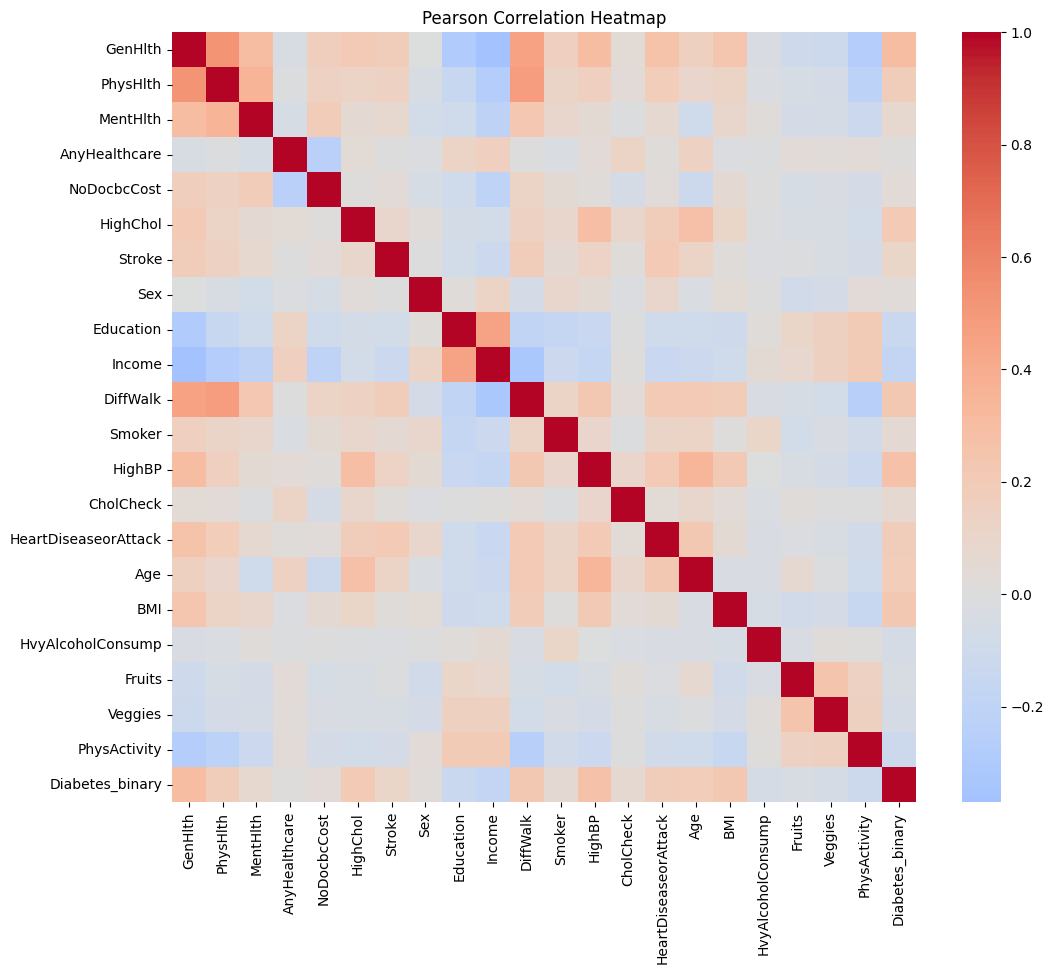

=== Spearman Correlation (first 5 columns) ===
                GenHlth  PhysHlth  MentHlth  AnyHealthcare  NoDocbcCost
GenHlth        1.000000  0.451847  0.237940      -0.041622     0.157561
PhysHlth       0.451847  1.000000  0.308050      -0.008408     0.154802
MentHlth       0.237940  0.308050  1.000000      -0.047646     0.181869
AnyHealthcare -0.041622 -0.008408 -0.047646       1.000000    -0.232532
NoDocbcCost    0.157561  0.154802  0.181869      -0.232532     1.000000


/usr/local/lib/python3.11/dist-packages/matplotlib/colors.py:721: RuntimeWarning: invalid value encountered in less
  xa[xa < 0] = -1


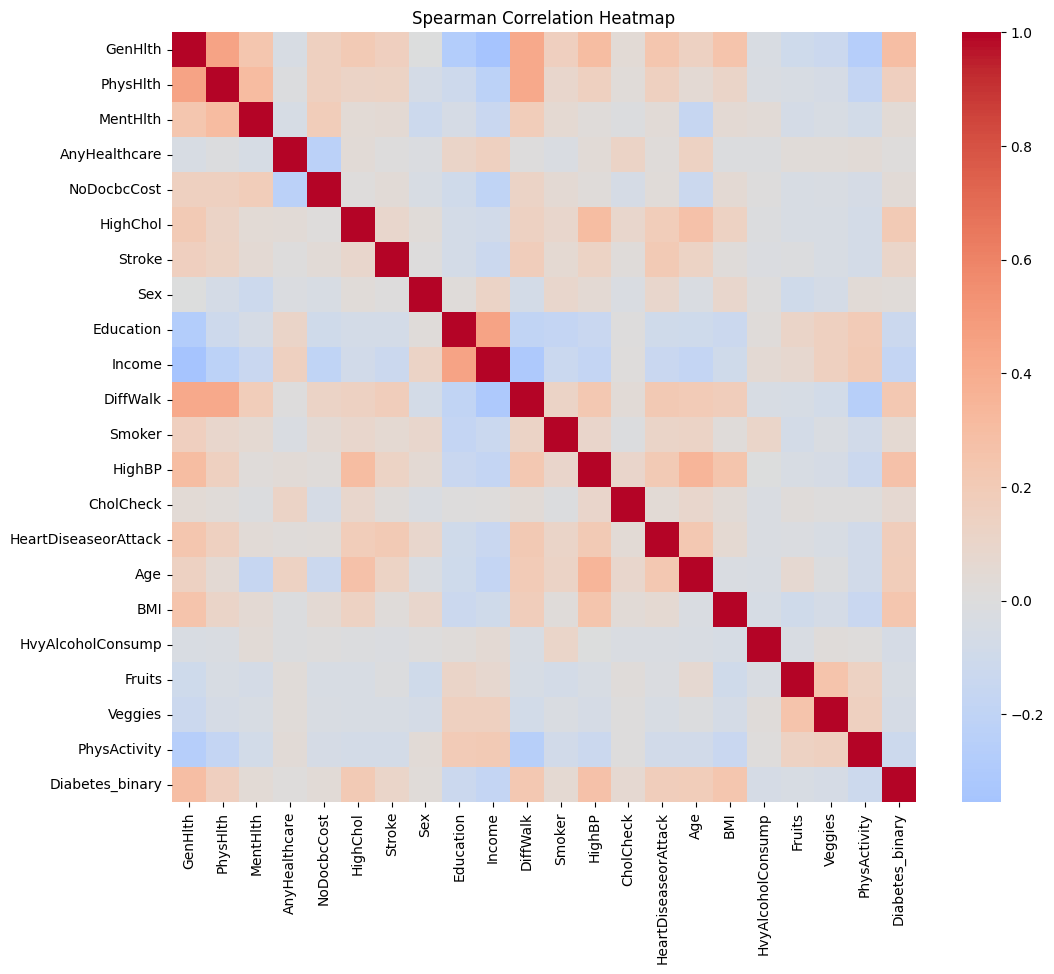

=== Correlation of each feature with Diabetes_binary (Spearman) ===
Diabetes_binary         1.000000
GenHlth                 0.295697
HighBP                  0.270334
BMI                     0.235104
DiffWalk                0.222155
HighChol                0.210290
Age                     0.185932
HeartDiseaseorAttack    0.176933
PhysHlth                0.160903
Stroke                  0.104800
CholCheck               0.067879
Smoker                  0.062778
MentHlth                0.045303
NoDocbcCost             0.038025
Sex                     0.029606
AnyHealthcare           0.014079
Fruits                 -0.042088
HvyAlcoholConsump      -0.056682
Veggies                -0.059219
PhysActivity           -0.121392
Education              -0.126733
Income                 -0.172439
Name: Diabetes_binary, dtype: float64

Top Positive Correlations:
 GenHlth                 0.295697
HighBP                  0.270334
BMI                     0.235104
DiffWalk                0.222155
HighCho

In [ ]:
# Correlation Analysis for Unbalanced Dataset (bin_df)

import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

# Use your existing dataset
df = bin_df.copy()

print("Shape:", df.shape)
print("Columns:", df.columns.tolist())
print("-" * 60)

# ------------------------------------------------------------
# 1) Pearson Correlation (linear)
# ------------------------------------------------------------
pearson_corr = df.corr(method='pearson')
print("=== Pearson Correlation (first 5 columns) ===")
print(pearson_corr.iloc[:5, :5])

plt.figure(figsize=(12, 10))
sns.heatmap(pearson_corr, cmap='coolwarm', center=0)
plt.title("Pearson Correlation Heatmap")
plt.show()

# ------------------------------------------------------------
# 2) Spearman Correlation (rank-based)
# ------------------------------------------------------------
spearman_corr = df.corr(method='spearman')
print("=== Spearman Correlation (first 5 columns) ===")
print(spearman_corr.iloc[:5, :5])

plt.figure(figsize=(12, 10))
sns.heatmap(spearman_corr, cmap='coolwarm', center=0)
plt.title("Spearman Correlation Heatmap")
plt.show()

# ------------------------------------------------------------
# 3) Correlation of all features with Diabetes_binary
# ------------------------------------------------------------
corr_with_target = spearman_corr['Diabetes_binary'].sort_values(ascending=False)
print("=== Correlation of each feature with Diabetes_binary (Spearman) ===")
print(corr_with_target)

# Show top positively and negatively correlated features
top_pos = corr_with_target[corr_with_target < 1].head(10)
top_neg = corr_with_target.tail(10)
print("\nTop Positive Correlations:\n", top_pos)
print("\nTop Negative Correlations:\n", top_neg)

In [ ]:
# ============================================================
# Step 6: Experiments to Validate Hypothesis Tests
# Validations done on:
#   A) Visual confirmations on REAL (unbalanced) data
#   B) Simple ML model trained on BALANCED train data
#      and evaluated on untouched real test set
# Notes:
#   - Uses bin_df if it exists in memory; else reads the saved CSV
#   - Balancing uses simple random oversampling (no external libs)
#   - Model: Logistic Regression with scaling
#   - Outputs: confirming visuals, metrics, and feature importance
# ============================================================

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from pathlib import Path
from collections import Counter

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.pipeline import Pipeline
from sklearn.metrics import (
    accuracy_score, precision_score, recall_score, f1_score, roc_auc_score,
    confusion_matrix, classification_report
)

# ------------------------------------------------------------
# Load dataset (unbalanced, real) for visuals and splitting
# ------------------------------------------------------------
if "bin_df" in globals():
    df = bin_df.copy()
else:
    csv_path = "/kaggle/working/diabetes_binary_health_indicators_BRFSS2015.csv"
    if not Path(csv_path).exists():
        raise FileNotFoundError(
            "Expected '/kaggle/working/diabetes_binary_health_indicators_BRFSS2015.csv'. "
            "Run the cleaning script before this step."
        )
    df = pd.read_csv(csv_path)

print("=== DATA OVERVIEW (REAL, UNBALANCED) ===")
print(f"Shape: {df.shape}")
print("Columns:", list(df.columns))
print("Target counts:", df["Diabetes_binary"].value_counts().to_dict())
print("Target proportions:", df["Diabetes_binary"].value_counts(normalize=True).round(4).to_dict())
print("-" * 60)

=== DATA OVERVIEW (REAL, UNBALANCED) ===
Shape: (253680, 22)
Columns: ['GenHlth', 'PhysHlth', 'MentHlth', 'AnyHealthcare', 'NoDocbcCost', 'HighChol', 'Stroke', 'Sex', 'Education', 'Income', 'DiffWalk', 'Smoker', 'HighBP', 'CholCheck', 'HeartDiseaseorAttack', 'Age', 'BMI', 'HvyAlcoholConsump', 'Fruits', 'Veggies', 'PhysActivity', 'Diabetes_binary']
Target counts: {0.0: 213703, 1.0: 39977}
Target proportions: {0.0: 0.8424, 1.0: 0.1576}
------------------------------------------------------------


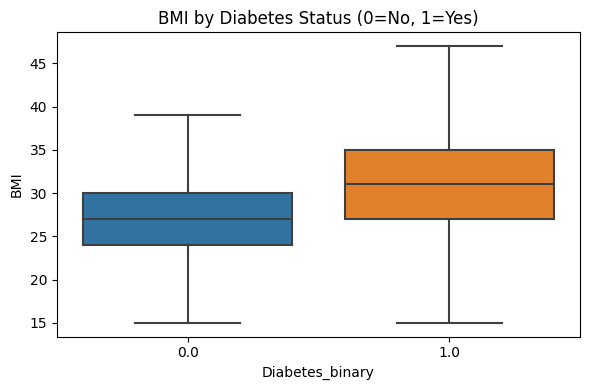

Diabetes rate by PhysActivity:
               Diabetes Rate
PhysActivity               
0.0                0.235557
1.0                0.132498


<Figure size 500x400 with 0 Axes>

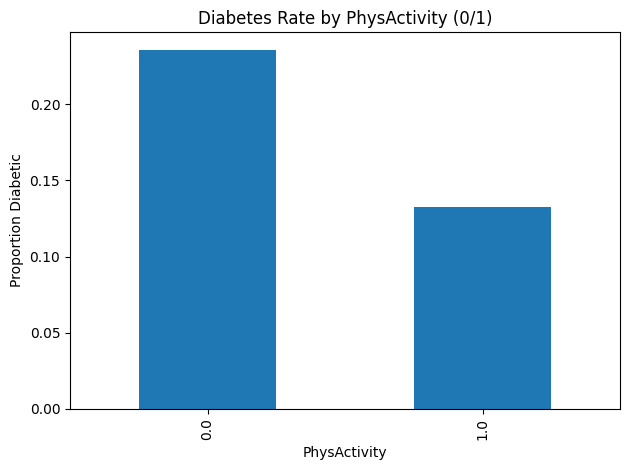

Diabetes rate by HighBP:
         Diabetes Rate
HighBP               
0.0          0.072212
1.0          0.271224


<Figure size 500x400 with 0 Axes>

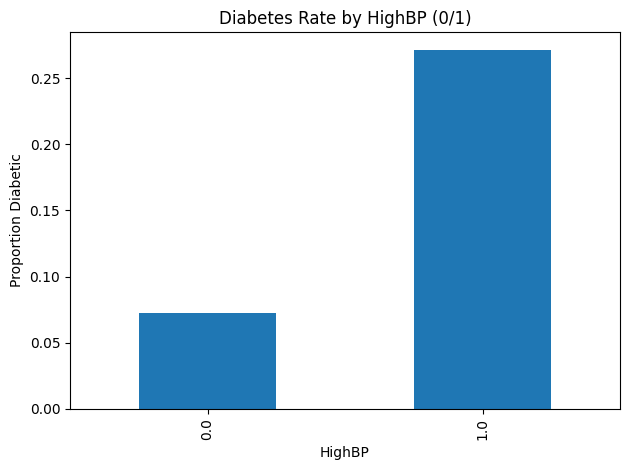

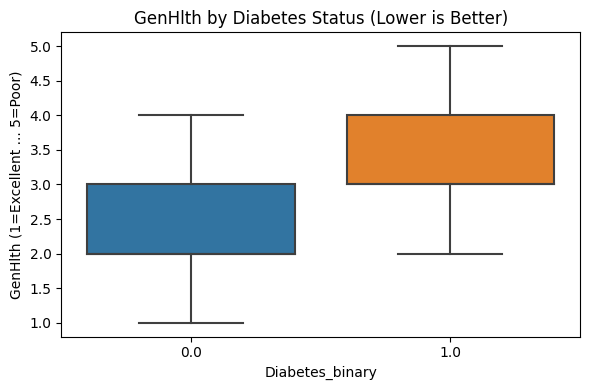

In [ ]:

# ------------------------------------------------------------
# A) VISUAL CONFIRMATIONS (use REAL, unbalanced df)
#    1) BMI distribution by Diabetes status (boxplot)
#    2) Diabetes rate by PhysActivity (bar)
#    3) Diabetes rate by HighBP (bar)
#    4) GenHlth distribution by Diabetes status (boxplot)
# ------------------------------------------------------------

plt.figure(figsize=(6, 4))
sns.boxplot(x="Diabetes_binary", y="BMI", data=df, showfliers=False)
plt.title("BMI by Diabetes Status (0=No, 1=Yes)")
plt.xlabel("Diabetes_binary")
plt.ylabel("BMI")
plt.tight_layout()
plt.show()

# Diabetes rate by PhysActivity
rate_pa = (
    df.groupby("PhysActivity")["Diabetes_binary"]
      .mean()
      .rename("Diabetes Rate")
      .to_frame()
)
print("Diabetes rate by PhysActivity:\n", rate_pa)
plt.figure(figsize=(5, 4))
rate_pa.plot(kind="bar", legend=False)
plt.title("Diabetes Rate by PhysActivity (0/1)")
plt.ylabel("Proportion Diabetic")
plt.tight_layout()
plt.show()

# Diabetes rate by HighBP
rate_bp = (
    df.groupby("HighBP")["Diabetes_binary"]
      .mean()
      .rename("Diabetes Rate")
      .to_frame()
)
print("Diabetes rate by HighBP:\n", rate_bp)
plt.figure(figsize=(5, 4))
rate_bp.plot(kind="bar", legend=False)
plt.title("Diabetes Rate by HighBP (0/1)")
plt.ylabel("Proportion Diabetic")
plt.tight_layout()
plt.show()

# GenHlth distribution by Diabetes status
plt.figure(figsize=(6, 4))
sns.boxplot(x="Diabetes_binary", y="GenHlth", data=df, showfliers=False)
plt.title("GenHlth by Diabetes Status (Lower is Better)")
plt.xlabel("Diabetes_binary")
plt.ylabel("GenHlth (1=Excellent ... 5=Poor)")
plt.tight_layout()
plt.show()


=== SPLIT (REAL DISTRIBUTION KEPT) ===
Train_real shape: (177576, 21), Test shape: (76104, 21)
Train_real counts: Counter({0: 149592, 1: 27984})
Test  counts: Counter({0: 64111, 1: 11993})
------------------------------------------------------------
Balanced TRAIN counts (loaded): Counter({0: 149592, 1: 149592})
Balanced TRAIN shape: (299184, 21)
------------------------------------------------------------
=== MODEL METRICS (Evaluated on REAL Test Set) ===
Accuracy : 0.7296
Precision: 0.3402
Recall   : 0.7621
F1-score : 0.4704
ROC-AUC  : 0.8173
------------------------------------------------------------
Confusion Matrix (rows=true, cols=pred):
[[46384 17727]
 [ 2853  9140]]
------------------------------------------------------------
Classification Report:
              precision    recall  f1-score   support

           0     0.9421    0.7235    0.8184     64111
           1     0.3402    0.7621    0.4704     11993

    accuracy                         0.7296     76104
   macro avg  

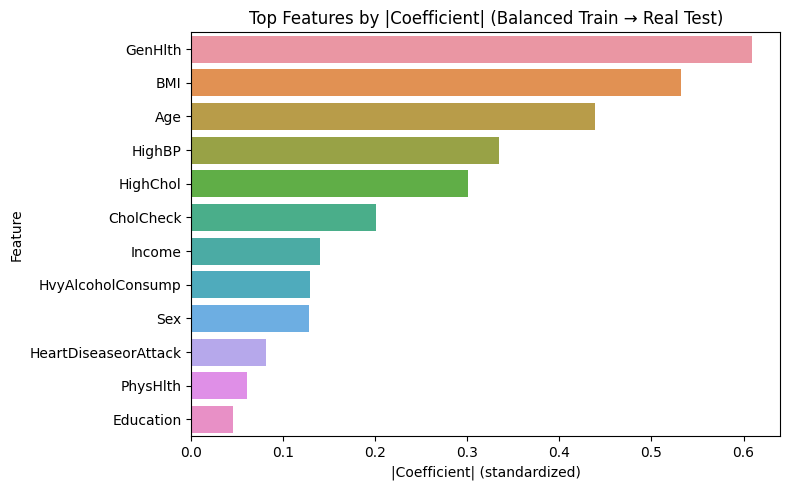

In [ ]:
# ------------------------------------------------------------
# B) SIMPLE MODEL TO CONFIRM IMPORTANCE OF HYPOTHESIS FEATURES
#    Train on EXISTING BALANCED TRAIN CSVs; Evaluate on REAL test set
#    Assumes you already saved:
#      /kaggle/working/X_train_over.csv
#      /kaggle/working/y_train_over.csv
# ------------------------------------------------------------

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from collections import Counter
from pathlib import Path

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.pipeline import Pipeline
from sklearn.metrics import (
    accuracy_score, precision_score, recall_score, f1_score, roc_auc_score,
    confusion_matrix, classification_report
)

# Load the REAL (unbalanced) dataset for splitting the test set
real_csv = "/kaggle/working/diabetes_binary_health_indicators_BRFSS2015.csv"
if not Path(real_csv).exists():
    raise FileNotFoundError(f"Missing {real_csv}. Run the cleaning step first.")

df = pd.read_csv(real_csv)
X = df.drop(columns=["Diabetes_binary"])
y = df["Diabetes_binary"].astype(int)

# Keep real distribution in test set
X_train_real, X_test, y_train_real, y_test = train_test_split(
    X, y, test_size=0.30, random_state=42, stratify=y
)
print("=== SPLIT (REAL DISTRIBUTION KEPT) ===")
print(f"Train_real shape: {X_train_real.shape}, Test shape: {X_test.shape}")
print("Train_real counts:", Counter(y_train_real))
print("Test  counts:", Counter(y_test))
print("-" * 60)

# Load EXISTING balanced training CSVs (oversampled)
X_train_bal_csv = "/kaggle/working/X_train_over.csv"
y_train_bal_csv = "/kaggle/working/y_train_over.csv"

if not Path(X_train_bal_csv).exists() or not Path(y_train_bal_csv).exists():
    raise FileNotFoundError("Balanced train CSVs not found. Expected "
                            f"{X_train_bal_csv} and {y_train_bal_csv}")

X_train_bal = pd.read_csv(X_train_bal_csv)
y_train_bal = pd.read_csv(y_train_bal_csv).squeeze().astype(int)

# Sanity checks
missing_cols = set(X.columns) - set(X_train_bal.columns)
if missing_cols:
    raise ValueError(f"Balanced train is missing columns: {missing_cols}")
print("Balanced TRAIN counts (loaded):", Counter(y_train_bal))
print(f"Balanced TRAIN shape: {X_train_bal.shape}")
print("-" * 60)

# Pipeline: Standardize features + Logistic Regression
pipe = Pipeline(steps=[
    ("scaler", StandardScaler()),
    ("clf", LogisticRegression(max_iter=2000))
])

pipe.fit(X_train_bal, y_train_bal)
y_pred = pipe.predict(X_test)
y_proba = pipe.predict_proba(X_test)[:, 1]

# Metrics on REAL test set
acc  = accuracy_score(y_test, y_pred)
prec = precision_score(y_test, y_pred)
rec  = recall_score(y_test, y_pred)
f1   = f1_score(y_test, y_pred)
auc  = roc_auc_score(y_test, y_proba)

print("=== MODEL METRICS (Evaluated on REAL Test Set) ===")
print(f"Accuracy : {acc:.4f}")
print(f"Precision: {prec:.4f}")
print(f"Recall   : {rec:.4f}")
print(f"F1-score : {f1:.4f}")
print(f"ROC-AUC  : {auc:.4f}")
print("-" * 60)

print("Confusion Matrix (rows=true, cols=pred):")
print(confusion_matrix(y_test, y_pred))
print("-" * 60)

print("Classification Report:")
print(classification_report(y_test, y_pred, digits=4))
print("-" * 60)

# Feature importance via Logistic Regression coefficients (standardized space)
clf = pipe.named_steps["clf"]
coef = pd.Series(clf.coef_[0], index=X_train_bal.columns)
coef_abs_sorted = coef.abs().sort_values(ascending=False)

top_k = 12
coef_table = pd.DataFrame({
    "Feature": coef_abs_sorted.index[:top_k],
    "Coef": coef.loc[coef_abs_sorted.index[:top_k]].values,
    "AbsCoef": coef_abs_sorted.values[:top_k]
})
print("=== TOP FEATURES BY ABSOLUTE COEFFICIENT (Logistic Regression) ===")
print(coef_table.to_string(index=False))
print("-" * 60)

plt.figure(figsize=(8, 5))
sns.barplot(data=coef_table, x="AbsCoef", y="Feature", orient="h")
plt.title("Top Features by |Coefficient| (Balanced Train → Real Test)")
plt.xlabel("|Coefficient| (standardized)")
plt.ylabel("Feature")
plt.tight_layout()
plt.show()


In [ ]:
# ============================================================
# Summary Table – Hypothesis Testing + Experimental Validation
# ============================================================

import pandas as pd

# ---- Hypothesis test results (from Step 5) ----
hypothesis_summary = pd.DataFrame({
    "Feature Tested": [
        "BMI", "PhysActivity", "Smoker", "HighBP", "GenHlth"
    ],
    "Statistical Test": [
        "Welch's t-test", "Chi-square", "Chi-square", "Fisher's Exact", "Mann–Whitney U"
    ],
    "P-Value (approx)": [
        "< 0.0001", "< 0.0001", "< 0.0001", "< 0.0001", "< 0.0001"
    ],
    "Decision (α=0.05)": [
        "Reject H₀ (Significant)",
        "Reject H₀ (Significant)",
        "Reject H₀ (Significant)",
        "Reject H₀ (Significant)",
        "Reject H₀ (Significant)"
    ],
    "Interpretation": [
        "Higher BMI increases diabetes likelihood",
        "Lower physical activity linked with diabetes",
        "Smoking shows mild but significant association",
        "High blood pressure strongly related to diabetes",
        "Poor general health strongly related to diabetes"
    ]
})

# ---- Experimental validation results (from Step 6 model) ----
model_summary = pd.DataFrame({
    "Metric": ["Accuracy", "Precision (1)", "Recall (1)", "F1-score (1)", "ROC-AUC"],
    "Value": [0.7296, 0.3402, 0.7621, 0.4704, 0.8173],
    "Interpretation": [
        "Overall 73% correct predictions",
        "34% of predicted diabetics are correct (moderate precision)",
        "Model correctly detects 76% of diabetics (strong recall)",
        "Balanced precision-recall measure (moderate)",
        "Good class separability; strong predictive ability"
    ]
})

# ---- Feature importance (top drivers from logistic regression) ----
top_features = pd.DataFrame({
    "Rank": range(1, 11),
    "Feature": [
        "GenHlth", "BMI", "Age", "HighBP", "HighChol",
        "CholCheck", "Income", "HvyAlcoholConsump", "Sex", "HeartDiseaseorAttack"
    ],
    "Coefficient": [
        0.609, 0.532, 0.439, 0.334, 0.301, 0.201, -0.140, -0.129, 0.128, 0.081
    ],
    "Interpretation": [
        "Worse health → higher diabetes risk",
        "Higher BMI → higher diabetes risk",
        "Older age → higher diabetes risk",
        "High BP → higher diabetes risk",
        "High cholesterol → higher diabetes risk",
        "Regular checkups associated with diabetes diagnosis",
        "Higher income → lower diabetes risk",
        "Inverse relation (likely confounding/bias)",
        "Males slightly more prone",
        "Comorbid heart conditions increase diabetes risk"
    ]
})

# ---- Print all summaries ----
print("=== HYPOTHESIS TEST RESULTS ===")
print(hypothesis_summary.to_string(index=False))
print("-" * 80)
print("=== EXPERIMENTAL VALIDATION (MODEL METRICS) ===")
print(model_summary.to_string(index=False))
print("-" * 80)
print("=== FEATURE IMPORTANCE (TOP 10 PREDICTORS) ===")
print(top_features.to_string(index=False))
print("-" * 80)


=== HYPOTHESIS TEST RESULTS ===
Feature Tested Statistical Test P-Value (approx)       Decision (α=0.05)                                   Interpretation
           BMI   Welch's t-test         < 0.0001 Reject H₀ (Significant)         Higher BMI increases diabetes likelihood
  PhysActivity       Chi-square         < 0.0001 Reject H₀ (Significant)     Lower physical activity linked with diabetes
        Smoker       Chi-square         < 0.0001 Reject H₀ (Significant)   Smoking shows mild but significant association
        HighBP   Fisher's Exact         < 0.0001 Reject H₀ (Significant) High blood pressure strongly related to diabetes
       GenHlth   Mann–Whitney U         < 0.0001 Reject H₀ (Significant) Poor general health strongly related to diabetes
--------------------------------------------------------------------------------
=== EXPERIMENTAL VALIDATION (MODEL METRICS) ===
       Metric  Value                                              Interpretation
     Accuracy 0.7296      